Analysis of the MCMC optimization 

In [1]:
using DataFrames , CSV , Statistics
using PyPlot

## directory
rootdir = "/home/stephane/Science/cluster/GAIA"
wdir    = "/home/stephane/Science/cluster/GAIA/products"
plotdir = "/home/stephane/Science/cluster/GAIA/products/testfull2"

cd(wdir)

In [2]:
## Reading and joining the results from normal and full MCMC dbscan optimization.

mc     = CSV.read("ngclist-mcmc2.csv" , delim = ";")
mcfull = CSV.read("ngclist-mcmc_full2.csv", delim = ";")
mcj    = join(mc,mcfull, on = :votname, makeunique=true)

,votname,epsm,epsd,mneim,mneid,mclm,mcld,qcm,qcd,qnm,qnd,epsm_1,epsd_1,mneim_1,mneid_1,mclm_1,mcld_1,qcm_1,qcd_1,qnm_1,qnd_1,w3dm,w3dd,wvelm,wveld,whrdm,whrdd
,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,NGC 1027-1.2deg.vot,2.72794,0.473565,7.2008,4.38594,16.8501,6.94689,2.38832,0.128183,301.148,75.7916,2.37115,0.448409,6.8345,4.03163,17.0559,6.56081,2.54045,0.0867087,326.159,76.6556,4.80291,2.14221,8.41717,3.03457,2.06651,0.879658
2,NGC 1039-3.6deg.vot,2.22515,0.39764,8.72727,5.61239,15.4329,6.91008,2.81693,0.090365,263.715,34.1295,2.01446,0.467261,7.37229,4.39724,16.6976,6.24589,2.81906,0.0931298,273.987,38.3343,4.1208,1.96629,6.28673,2.49383,2.01128,0.823723
3,NGC 129-0.8deg.vot,3.67179,0.557009,6.30669,3.79797,17.1332,6.83655,1.72362,0.407088,144.362,78.4628,2.49668,0.62571,6.25375,3.79569,18.3353,7.17896,1.92812,0.113583,211.196,89.9968,2.5154,1.37501,7.69566,2.36653,2.05379,0.837394
4,NGC 1342-1.4deg.vot,2.67188,0.554229,8.77056,5.49195,14.656,6.35067,2.36881,0.112841,171.387,23.2232,2.25954,0.597269,6.99767,4.24197,17.8675,6.78879,2.51639,0.0702365,178.932,22.8503,4.75147,2.02654,9.16803,3.50251,2.1085,0.935588
5,NGC 1348-0.6deg.vot,3.22255,0.869193,8.2654,5.69036,6.004,2.61765,1.15706,0.233514,9.26174,2.22084,5.19084,0.931068,5.74992,3.46743,17.956,6.91565,1.20001,0.0812,1058.37,525.095,8.20416,3.88231,1.433,1.03275,2.28184,0.93276
6,NGC 1496-0.3deg.vot,3.99435,0.78105,6.55611,5.20055,11.5601,4.55516,1.25554,0.183037,20.5441,3.99078,2.72098,0.658493,6.86813,4.01338,16.9554,6.69284,1.59418,0.107307,78.8898,22.0252,1.14207,0.719438,8.74818,3.68385,2.10483,0.920587
7,NGC 1502-1.5deg.vot,3.53956,0.54049,7.90043,4.03743,16.707,6.36059,1.97457,0.126711,103.021,31.6792,2.32961,0.607829,6.35032,3.87537,17.0303,6.3253,2.26282,0.0618847,147.242,34.9529,2.64091,1.30098,8.76029,3.08547,2.33667,1.00493
8,NGC 1513-0.8deg.vot,3.48452,0.506381,7.26873,4.04876,16.4456,6.82273,1.95383,0.126906,161.374,71.9686,2.60267,0.643944,6.14219,3.57196,16.4003,6.12747,2.10614,0.0999597,213.435,60.4437,2.7767,1.54797,6.85113,2.90866,2.06802,0.844014
9,NGC 1528-2.2deg.vot,2.95791,0.437941,7.86014,4.17534,17.7313,6.50173,2.21031,0.139292,252.412,71.7894,2.2784,0.562017,7.09724,4.15384,18.3723,7.0408,2.35012,0.116344,282.978,74.7923,3.53995,1.88339,7.29784,2.52401,2.01439,0.873192


In [3]:
sc     = CSV.read("ngclist-SCproperties2.csv",delim = ";")
scfull = CSV.read("ngclist-SCproperties_full2.csv",delim = ";")
scj    = join(sc,scfull, on = :votname, makeunique=true)

,votname,nstars,distance,l,b,vra,vdec,xdisp,ydisp,zdisp,vradisp,vdecdisp,nstars_1,distance_1,l_1,b_1,vra_1,vdec_1,xdisp_1,ydisp_1,zdisp_1,vradisp_1,vdecdisp_1
,String⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,NGC 1027-1.2deg.vot,337,1129.14,135.756,1.54576,-9.23245,11.2117,42.9331,3.86452,2.87884,1.28688,1.38015,330,1129.27,135.752,1.54622,-9.26811,11.2707,43.194,3.82674,2.90488,1.162,1.28303
2,NGC 1039-3.6deg.vot,265,512.641,143.666,-15.6648,1.98996,-13.8612,16.0059,3.27304,2.59531,0.811972,0.918965,273,512.718,143.668,-15.6736,1.99284,-13.8439,17.0312,3.33075,2.68009,0.803894,0.875605
3,NGC 129-0.8deg.vot,125,1945.06,120.349,-2.54384,-23.8048,-10.1507,34.0712,5.07827,3.9077,1.61867,1.73341,215,1889.6,120.348,-2.53889,-23.2808,-9.8425,71.0117,5.63556,4.35943,1.40918,1.21505
4,NGC 1342-1.4deg.vot,176,662.373,154.922,-15.3254,2.03695,-5.03637,15.3509,3.50241,2.9365,0.851753,0.908358,179,662.672,154.925,-15.3204,2.05924,-5.00978,16.0633,3.5116,2.93841,0.762453,0.854931
5,NGC 1348-0.6deg.vot,8,173.56,146.898,-3.85453,18.5911,-21.5392,3.05119,1.02692,0.877703,0.32857,0.471655,872,595.809,146.992,-3.70291,12.3758,-18.9358,182.345,3.07492,3.0293,21.3639,19.7971
6,NGC 1496-0.3deg.vot,22,1642.92,149.844,0.196893,11.5295,-6.32349,12.0617,2.64078,2.51636,1.17069,1.44705,83,1632.12,149.838,0.189006,11.4408,-6.17324,79.0939,2.4236,2.63463,1.49044,1.46844
7,NGC 1502-1.5deg.vot,96,1071.27,143.635,7.69218,-3.15892,-4.37951,24.7286,2.83451,3.87631,0.948312,1.13133,149,1082.42,143.599,7.66157,-3.21794,-4.34267,31.4846,5.37661,6.53499,0.977305,0.975905
8,NGC 1513-0.8deg.vot,184,1524.85,152.59,-1.58528,9.76941,-26.694,48.6144,3.4372,2.91429,1.57997,1.80214,193,1522.39,152.596,-1.58642,9.61837,-26.5581,53.6559,3.50236,2.72935,1.38652,1.65668
9,NGC 1528-2.2deg.vot,257,1036.28,152.033,0.271503,10.7101,-11.064,34.5705,4.36919,3.31957,1.42159,1.24598,258,1036.19,152.046,0.265416,10.6573,-10.9888,36.549,4.67239,3.26395,1.1132,1.13002


In [4]:
println("## Summary :")
println("##")
println("## votable with dbscan-only :",size(sc))
println("## votable with dbscan-weighting :",size(scfull))
println("## Join votable :",size(scj))

## Summary :
##
## votable with dbscan-only :(26, 12)
## votable with dbscan-weighting :(12, 12)
## Join votable :(12, 23)


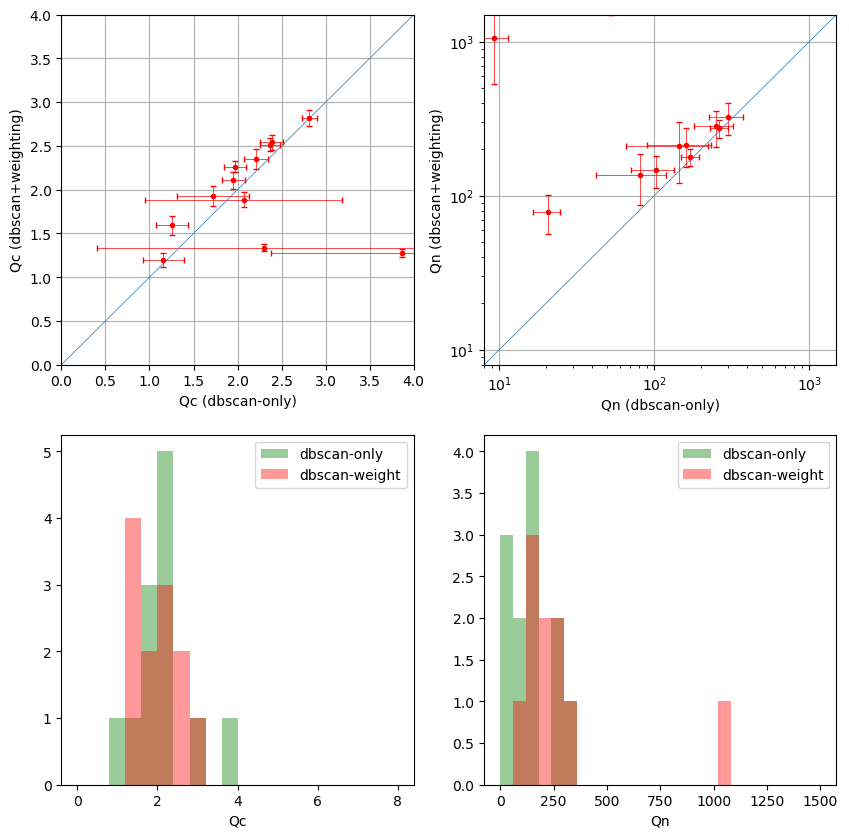

In [5]:
## Q comparisons

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10.],[0.,10] ,linewidth = 0.5)
errorbar(mcj[:qcm],mcj[:qcm_1] , xerr=mcj[:qcd],yerr= mcj[:qcd_1] , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax[:set_xlim]([0.,4.])
ax[:set_ylim]([0.,4.])
xlabel("Qc (dbscan-only)")
ylabel("Qc (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([1.,10000.],[1.,10000], linewidth = 0.5)
xscale("log")
yscale("log")
errorbar(mcj[:qnm],mcj[:qnm_1] , xerr=mcj[:qnd],yerr= mcj[:qnd_1] , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax[:set_xlim]([8.,1500.])
ax[:set_ylim]([8.,1500.])
xscale("log")
yscale("log")
xlabel("Qn (dbscan-only)")
ylabel("Qn (dbscan+weighting)")

ax = subplot(223)
nbins = 20
h = plt[:hist](mcj[:qcm],nbins,range = [0,8], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:qcm_1],nbins,range = [0,8], color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("Qc")

ax = subplot(224)
nbins = 25
h = plt[:hist](mcj[:qnm],nbins,range = [0,1500], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:qnm_1],nbins,range = [0,1500], color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("Qn")

show()

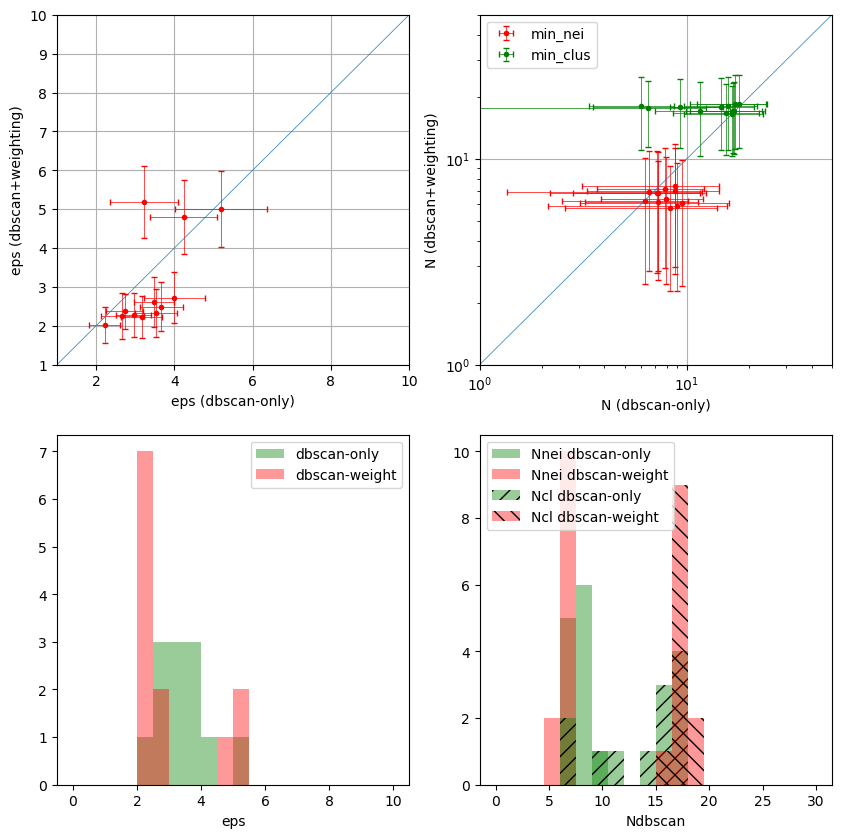

In [6]:
## comparison DBSCAN parameters

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10.],[0.,10], linewidth = 0.5)
errorbar(mcj[:epsm],mcj[:epsm_1] , xerr=mcj[:epsd],yerr= mcj[:epsd_1] , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax[:set_xlim]([1.,10])
ax[:set_ylim]([1.,10])
xlabel("eps (dbscan-only)")
ylabel("eps (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([0.,10000.],[0.,10000], linewidth = 0.5)
errorbar(mcj[:mneim],mcj[:mneim_1] , xerr=mcj[:mneid],yerr= mcj[:mneid_1] , fmt = ".r" , 
    capsize = 2 ,elinewidth=0.5, label="min_nei")
errorbar(mcj[:mclm],mcj[:mclm_1] , xerr=mcj[:mcld],yerr= mcj[:mcld_1] , fmt = ".g" , 
    capsize = 2 ,elinewidth=0.5, label="min_clus")
ax[:set_xlim]([1.,50])
ax[:set_ylim]([1.,50])
legend(loc="upper left")
xscale("log")
yscale("log")
xlabel("N (dbscan-only)")
ylabel("N (dbscan+weighting)")

ax = subplot(223)
nbins = 20
h = plt[:hist](mcj[:epsm],nbins,range = [0.,10.], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:epsm_1],nbins,range = [0., 10.] , color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("eps")

ax = subplot(224)
nbins = 20
h = plt[:hist](mcj[:mneim],nbins, range = [0,30],  color = "g", alpha=0.4 , label = "Nnei dbscan-only")
h = plt[:hist](mcj[:mneim_1],nbins, range = [0,30], color = "r", alpha=0.4 , label = "Nnei dbscan-weight")
h = plt[:hist](mcj[:mclm],nbins, range = [0,30], color = "g", hatch="//", alpha=0.4 , label = "Ncl dbscan-only")
h = plt[:hist](mcj[:mclm_1],nbins, range = [0,30], color = "r", hatch="\\\\", alpha=0.4 , label = "Ncl dbscan-weight")
legend(loc="upper left")
xlabel("Ndbscan")
show()

Weights: median


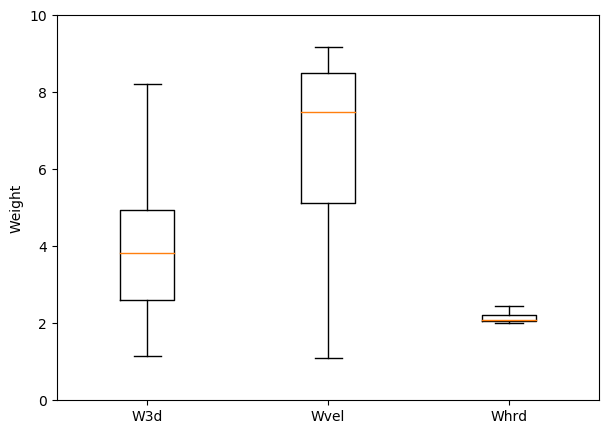

W3d : 3.8303747654262263
Wvel : 7.496752195776618
Whrd : 2.086423846984406


In [7]:
### Weighting stats ..
fig = figure(figsize=(7,5))

ax = subplot(111)
ax[:set_ylim]([0.,10.])
data = [mcfull[:w3dm] ,mcfull[:wvelm] , mcfull[:whrdm]]
boxplot(data)
ax[:set_xticklabels](["W3d","Wvel","Whrd"])
ylabel("Weight")

show()
println("Weights: median")
println("W3d : ",median(mcfull[:w3dm]))
println("Wvel : ",median(mcfull[:wvelm]))
println("Whrd : ",median(mcfull[:whrdm]))

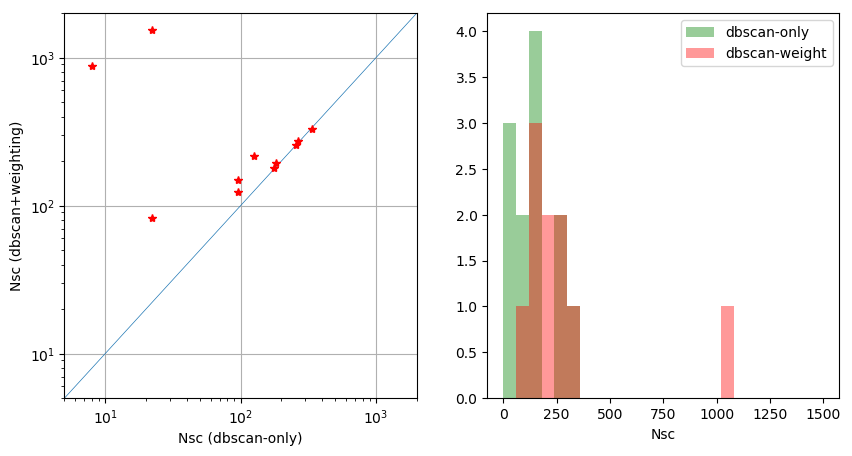

In [8]:
## Number of stars in the final SC

fig = figure(figsize=(10,5))

ax = subplot(121)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:nstars], scj[:nstars_1], "*r")
ax[:set_xlim]([5.,2000.])
ax[:set_ylim]([5.,2000.])
xlabel("Nsc (dbscan-only)")
ylabel("Nsc (dbscan+weighting)")
xscale("log")
yscale("log")

ax = subplot(122)
nbins = 25
h = plt[:hist](mcj[:qnm],nbins,range = [0,1500], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:qnm_1],nbins,range = [0,1500], color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("Nsc")

show()

###  Comparison of the SC properties for the optimization with DBSCAN only and DBSCAN+weighting 

<br>
<br>

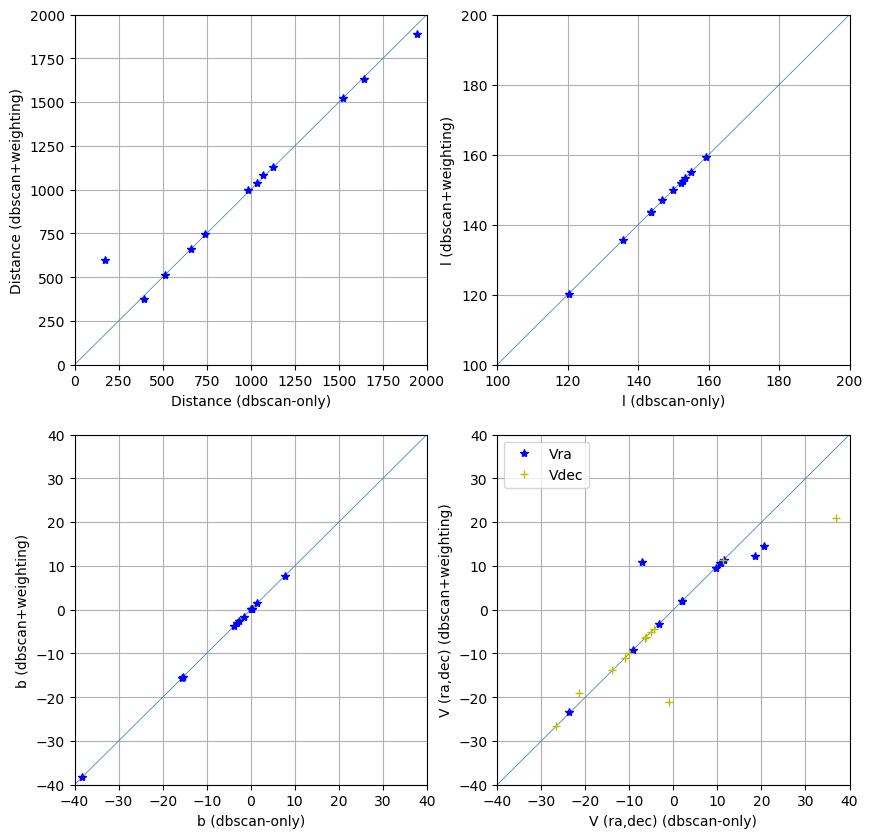

In [9]:
## Distance , position, velocity

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:distance], scj[:distance_1], "*b")
ax[:set_xlim]([0.,2000.])
ax[:set_ylim]([0.,2000.])
xlabel("Distance (dbscan-only)")
ylabel("Distance (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:l], scj[:l_1], "*b")
ax[:set_xlim]([100.,200.])
ax[:set_ylim]([100.,200.])
xlabel("l (dbscan-only)")
ylabel("l (dbscan+weighting)")

ax = subplot(223)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot(scj[:b], scj[:b_1], "*b")
ax[:set_xlim]([-40.,40.])
ax[:set_ylim]([-40.,40.])
xlabel("b (dbscan-only)")
ylabel("b (dbscan+weighting)")

ax = subplot(224)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot(scj[:vra], scj[:vra_1], "*b", label = "Vra")
plot(scj[:vdec], scj[:vdec_1], "+y", label = "Vdec")
legend()
ax[:set_xlim]([-40.,40.])
ax[:set_ylim]([-40.,40.])
xlabel("V (ra,dec) (dbscan-only)")
ylabel("V (ra,dec) (dbscan+weighting)")

show()

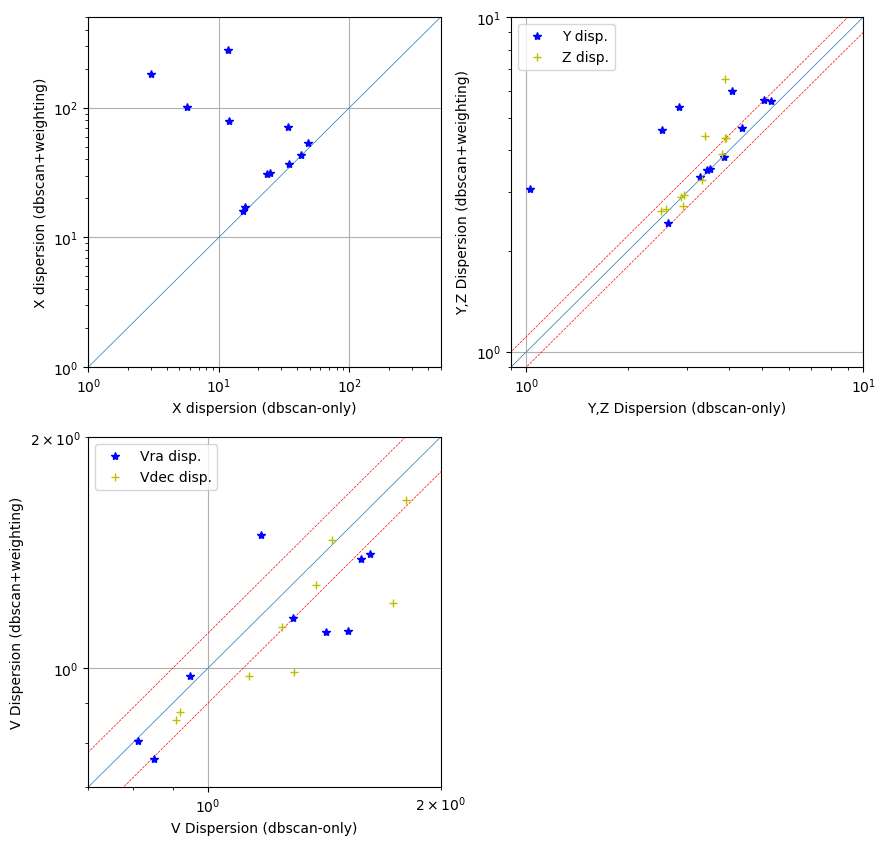

In [10]:
## Dispersions ...
fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:xdisp], scj[:xdisp_1], "*b")
ax[:set_xlim]([1,500.])
ax[:set_ylim]([1,500.])
xlabel("X dispersion (dbscan-only)")
ylabel("X dispersion (dbscan+weighting)")
xscale("log")
yscale("log")

ax = subplot(222)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot([-10000.,10000.],[-9000.,9000] ,"r--" ,linewidth = 0.5)
plot([-9000.,9000],[-10000.,10000.] ,"r--" ,linewidth = 0.5)
plot(scj[:ydisp], scj[:ydisp_1], "*b", label = "Y disp.")
plot(scj[:zdisp], scj[:zdisp_1], "+y", label = "Z disp.")
legend()
ax[:set_xlim]([0.9,10.])
ax[:set_ylim]([0.9,10.])
xlabel("Y,Z Dispersion (dbscan-only)")
ylabel("Y,Z Dispersion (dbscan+weighting)")

xscale("log")
yscale("log")


ax = subplot(223)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot([-10000.,10000.],[-9000.,9000] ,"r--" ,linewidth = 0.5)
plot([-9000.,9000],[-10000.,10000.] ,"r--" ,linewidth = 0.5)
plot(scj[:vradisp], scj[:vradisp_1], "*b", label = "Vra disp.")
plot(scj[:vdecdisp], scj[:vdecdisp_1], "+y", label = "Vdec disp.")
legend(loc="upper left")
ax[:set_xlim]([0.7, 2.])
ax[:set_ylim]([0.7, 2.])
xlabel("V Dispersion (dbscan-only)")
ylabel("V Dispersion (dbscan+weighting)")

xscale("log")
yscale("log")
show()